In [45]:
import numpy as np 
import matplotlib.pyplot as plt
import copy
import time


sqrt=lambda x : x**(1/2)
w=.92 
N=100
max_iterations=2500
threshold=1e-8
xmin=-.007
xmax=.007
ymax,ymin=xmax,xmin
left_x=[0,.0001,.0005,.0008,.001]
left_y=[100,100,100,100,100]
right_x=[.006,.007,.008]
right_y=[0,0,0]

a=.001
b=.006
V0=100
phi=lambda x,a,b,V0:V0*np.log(x/b)/np.log(a/b) 
e_field=lambda V0, x,a,b: (V0/x)*(1/-np.log(a/b))


def initialize_grid(xmin,xmax,ymin,ymax,X,Y,inner_r,outer_r,phi)->[[(float,int)]]:
    
    """
    
    
    """
    
    grid=[]
    ground=0
    flag=1
    for y in Y:
        row=[]
        for x in X:
            if np.sqrt(x**2+y**2)<=inner_r:
                    row.append([phi,flag])
            elif np.sqrt(x**2+y**2)>inner_r:
                if np.sqrt(x**2+y**2)>=outer_r:
                    row.append([ground,flag])
                else:
                    row.append([ground,flag-1])
        grid.append(row)
    return grid 
            
    

def overrelax(N,grid,threshold,w) -> None:
    """

    """

    potential_index = 0
    flag_index = 1
    diff_iteration = 1
    iterator = 0

    while iterator < max_iterations:

        prev_grid = copy.deepcopy(grid)
        diffs = []
        for i in range(0, N- 1):
            for j in range(0, N - 1):
                if grid[i][j][flag_index] == flag_index - 1:
                    grid[i][j][potential_index] = (1 + w) / 4 * (
                            grid[i + 1][j][potential_index] + grid[i - 1][j][potential_index] + grid[i][j + 1][
                        potential_index] + grid[i][j - 1][potential_index]) - w * grid[i][j][potential_index]
                    diffs.append(grid[i][j][potential_index] - prev_grid[i][j][potential_index])
                else: 
                    pass

        if max(diffs) <= threshold:
            break

        iterator += 1
        


def extract_potential(grid,x,y):
    
    """
    
    
    
    """
    potential_index=0
    potentials=[]
    for i in range(0,len(x)):
        row=[]
        for j in range(0, len(y)):
            row.append(grid[i][j][potential_index])
        potentials.append(row)

    return potentials


## investigating different N 
for n in [50]:
    
    N=2*n+1
    x=np.linspace(xmin,xmax,N)
    y=np.linspace(ymin,ymax,N)
    X,Y=np.meshgrid(x,y)
    spacing=x[1]-y[0]
    tic = time.perf_counter()
    grid=initialize_grid(xmin,xmax,ymin,ymax,x,y,a,b,V0)
    overrelax(N,grid,threshold,w)
    toc = time.perf_counter()
    print(f"Execution time for {N} : {toc - tic:0.4f} seconds")


Execution time for 101 : 8.6142 seconds


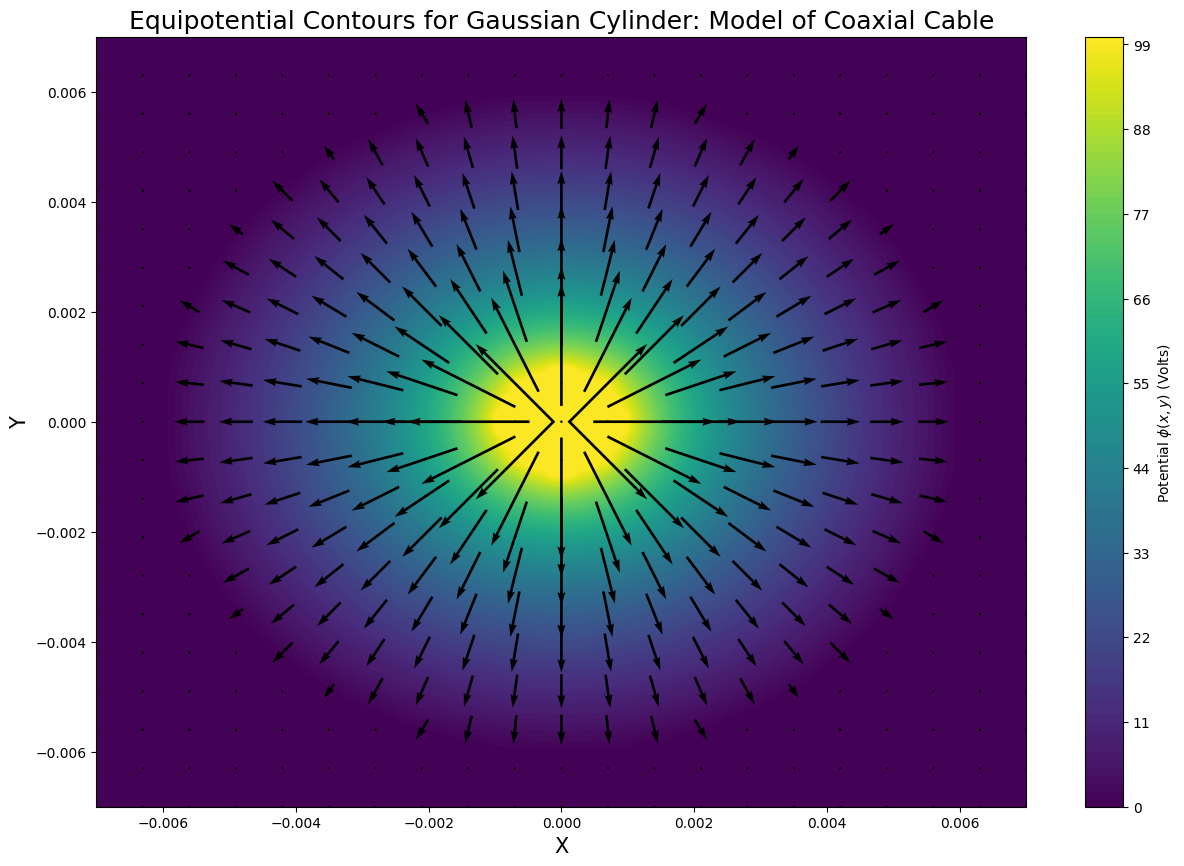

In [43]:
potentials=extract_potential(grid,x,y)
plt.figure(figsize=(15,10))
plt.contourf(X,Y,potentials,2*n+1) 
plt.colorbar(label='Potential $\phi(x,y)$ (Volts) ')  # put in colorbar for contourf
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',size=15)
# plt.grid('--')
plt.title(r'Equipotential Contours for Gaussian Cylinder: Model of Coaxial Cable',size=18)

E_field=np.negative(np.gradient(potentials,spacing))

E_y,E_x=E_field[0],E_field[1]

plt.quiver(X[::5,::5],Y[::5,::5],E_x[::5,::5],E_y[::5,::5],pivot='mid')

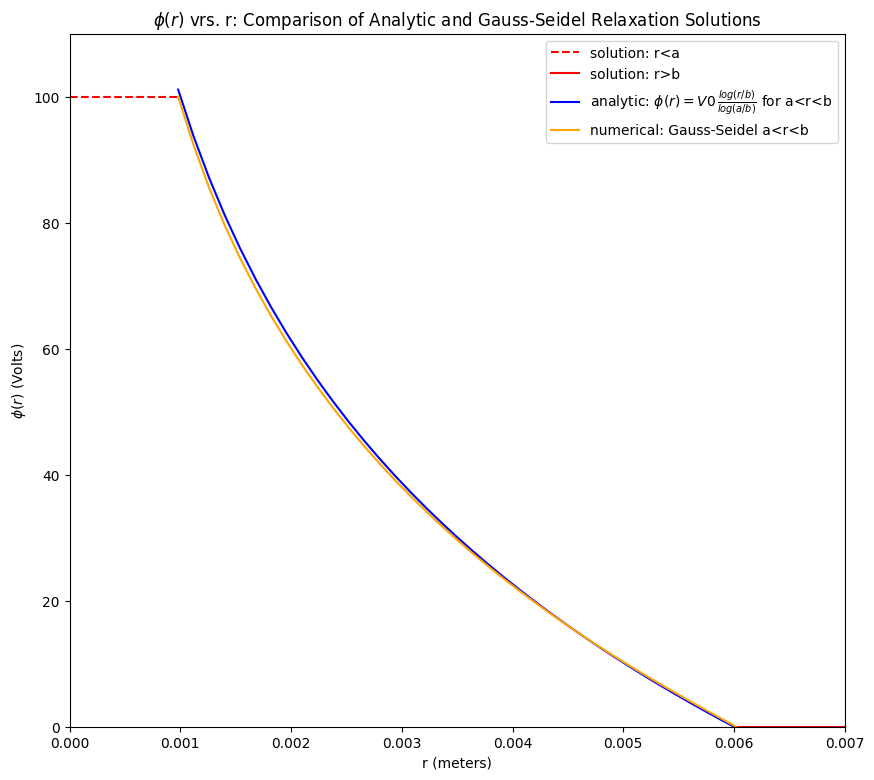

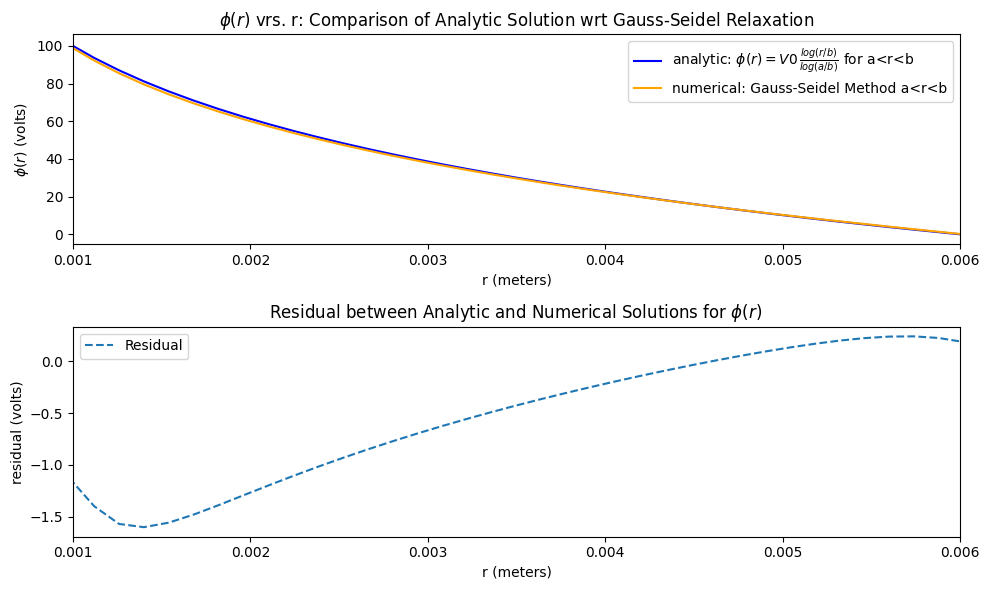

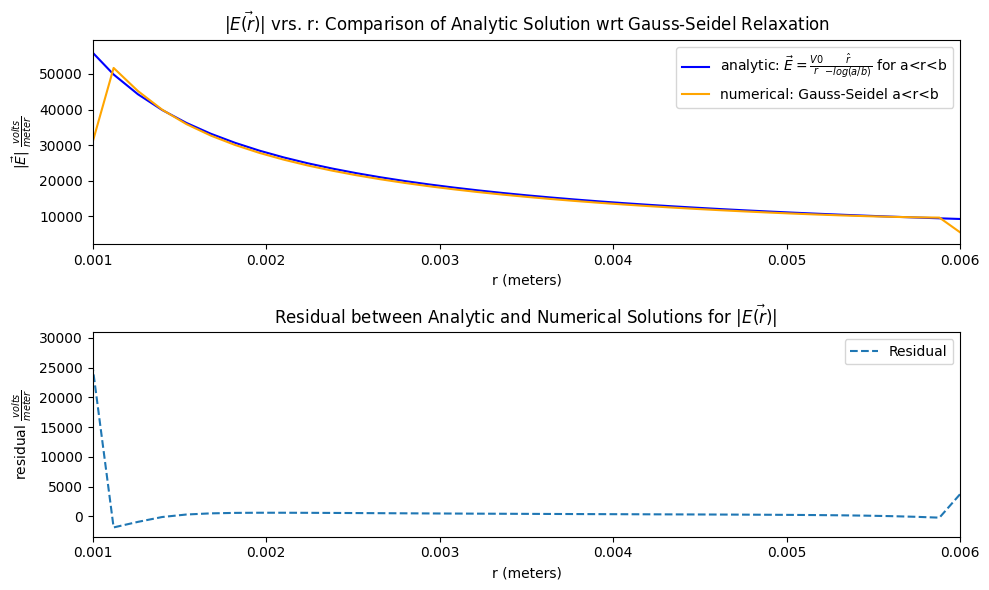

In [44]:
## figure 1
# x_analytic=np.linspace(a,b,2*N+1)
N=50
x=X[N][N+7:2*N-6]
potential_x=potentials[N][N+7:2*N-6]
e_x_axis=np.sqrt(E_x**2+E_y**2)[N][N+7:2*N-6]
y_analytic=phi(x,a,b,V0)
analytic_e=e_field(V0,x,a,b)

plt.figure(figsize=(10,9))
plt.plot(left_x,left_y,color='red',linestyle='--',label='solution: r<a')
plt.plot(right_x,right_y,color='red',linestyle='-',label='solution: r>b')
plt.plot(x,y_analytic,label=r'analytic: $\phi(r)=V0\, \frac{log(r/b)}{log(a/b)}$ for a<r<b',color='blue')
plt.plot(x,potential_x,label='numerical: Gauss-Seidel a<r<b',color='orange')
plt.xlim((0,.007))

plt.ylim((0,110))
plt.xlabel('r (meters)')
plt.ylabel('$\phi(r)$ (Volts)')
plt.title('$\phi(r)$ vrs. r: Comparison of Analytic and Gauss-Seidel Relaxation Solutions')
plt.legend()
plt.show()

## figure 2 
fig,axs=plt.subplots(2,figsize=(10,6))

axs[0].set_title('$\phi(r)$ vrs. r: Comparison of Analytic Solution wrt Gauss-Seidel Relaxation')
axs[0].set_xlabel('r (meters)')
axs[0].set_ylabel('$\phi(r)$ (volts)')
axs[0].plot(x,y_analytic,label=r'analytic: $\phi(r)=V0\, \frac{log(r/b)}{log(a/b)}$ for a<r<b',color='blue')
axs[0].plot(x,potential_x,label='numerical: Gauss-Seidel Method a<r<b',color='orange')
axs[0].legend(fancybox=True,shadow=False)
axs[0].set_xlim((.001,.006))

# axs[1].plot(x_analytic[8:],y_analytic[6:]-potentials[N][N+7:])

axs[1].set_title(r'Residual between Analytic and Numerical Solutions for $\phi(r)$ ')
axs[1].set_xlabel('r (meters)')
axs[1].set_ylabel('residual (volts)')
axs[1].plot(x,potential_x-y_analytic,label='Residual',linestyle='--')
axs[1].set_xlim((.001,.006))
axs[1].legend()
fig.tight_layout()

## figure 3 

## 

fig,axs=plt.subplots(2,figsize=(10,6))

axs[0].set_title(r'$|\vec{E(r)}|$ vrs. r: Comparison of Analytic Solution wrt Gauss-Seidel Relaxation')
axs[0].set_xlabel('r (meters)')
axs[0].set_ylabel(r'$|\vec{E}|$ $\frac{volts}{meter}$')
axs[0].plot(x,analytic_e,label=r'analytic: $ \vec{E}= \frac{V0}{r} \frac{\hat{r}}{-log(a/b)}$ for a<r<b',color='blue')
axs[0].plot(x,e_x_axis,label='numerical: Gauss-Seidel a<r<b',color='orange')
axs[0].legend(fancybox=True,shadow=False)
axs[0].set_xlim((.001,.006))

# axs[1].plot(x_analytic[8:],y_analytic[6:]-potentials[N][N+7:])


axs[1].set_title(r'Residual between Analytic and Numerical Solutions for $|\vec{E(r)}|$ ')
axs[1].set_xlabel('r (meters)')
axs[1].set_ylabel(r'residual $\frac{volts}{meter}$')
axs[1].plot(x,analytic_e-e_x_axis,label='Residual',linestyle='--')
axs[1].set_xlim((.001,.006))
axs[1].legend()

fig.tight_layout()



In [14]:
grid=initialize_grid(xmin,xmax,ymin,ymax,x,y,a,b,V0)

In [15]:
potentials=extract_potential(grid,N)


IndexError: list index out of range

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [49]:
np.sqrt(E_x**2+E_y**2)[][N+7:2*N-6]

IndexError: index 101 is out of bounds for axis 0 with size 101